
# Project: Investigate a Dataset (Medical Appointments No Show )

by Adeyinka Abiola (May, 2022)

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

Scheduling efficiency is most important in every practice especially in the health sector. Its no secret how annoying and discouraging missed appointments can be. A person makes a doctor appointment, receives all the instructions and no-show. Who to blame?

In this project I will be investigating a dataset that contains over 100k patient medical appointments in Brazil hospitals.
The data includes some characteristics about the patients and states whether or not the patient shows up for their appointment.

The orignal dataset can be found here: https://www.kaggle.com/datasets/joniarroba/noshowappointments

Notes:<br>
● ‘ScheduledDay’ tells us on what day the patient set up their appointment.<br>
● ‘Neighborhood’ indicates the location of the hospital.<br>
● ‘Scholarship’ indicates whether or not the patient is enrolled in Brasilian welfare program Bolsa Família.<br>
● Be careful about the encoding of the last column: it says ‘No’ if the patient showed up to their appointment, and ‘Yes’ if they did not show up.<br>


In [1]:
# Import all necessary packages needed

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

<a id='wrangling'></a>
## Data Wrangling

### General Properties

In [2]:
# laod the csv data and print out a few lines to see the overview of the data
med_df = pd.read_csv("KaggleV2-May-2016.csv")
med_df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [3]:
# checking for the size of the data set to show the number of rows and coulumns
med_df.shape

(110527, 14)

There are 110,527 patient records and 14 variables in the dataset

In [4]:
# from the overview of the data, some column names looked misspelled
# display only the column names for observation
med_df.columns

Index(['PatientId', 'AppointmentID', 'Gender', 'ScheduledDay',
       'AppointmentDay', 'Age', 'Neighbourhood', 'Scholarship', 'Hipertension',
       'Diabetes', 'Alcoholism', 'Handcap', 'SMS_received', 'No-show'],
      dtype='object')

In [5]:
# there are typos in the column name 'Hipertension' and 'Handcap', also the column name format should be 
# corrected to all lowercase
# change the column names in the data set to a correct and easier format
med_df.columns = ['patient_id', 'appointment_id', 'gender', 'scheduled_day', 'appointment_day', 'age', 'neighbourhood',
                 'scholarship', 'hypertension', 'diabetes', 'alcoholism', 'handicap', 'sms_received', 'no_show']

med_df.columns

Index(['patient_id', 'appointment_id', 'gender', 'scheduled_day',
       'appointment_day', 'age', 'neighbourhood', 'scholarship',
       'hypertension', 'diabetes', 'alcoholism', 'handicap', 'sms_received',
       'no_show'],
      dtype='object')

In [6]:
# display the changed view of the data
med_df.head()

,patient_id,appointment_id,gender,scheduled_day,appointment_day,age,neighbourhood,scholarship,hypertension,diabetes,alcoholism,handicap,sms_received,no_show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [7]:
med_df.describe()

,patient_id,appointment_id,age,scholarship,hypertension,diabetes,alcoholism,handicap,sms_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


In [8]:
med_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
patient_id         110527 non-null float64
appointment_id     110527 non-null int64
gender             110527 non-null object
scheduled_day      110527 non-null object
appointment_day    110527 non-null object
age                110527 non-null int64
neighbourhood      110527 non-null object
scholarship        110527 non-null int64
hypertension       110527 non-null int64
diabetes           110527 non-null int64
alcoholism         110527 non-null int64
handicap           110527 non-null int64
sms_received       110527 non-null int64
no_show            110527 non-null object
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


## Observations
The information above shows the following about the No Show Appointments dataset:
    1. The dataset has 14 variables where clearly there are 13 independent varibales and 1 dependent variable (no_show).
       Meaning that there are 13 factors that determine if a patient shows or does not show for his/her appointment
    2. There are 110,527 patient appointment records
    3. The dataset does not have any missing data in any of the variables (no NaN)
    4. The 'patient_id' column datatype is float but it should be in int datatype. # change the datatype to int
    5. The 'scheduled_day' and 'appointment_day' are supposed to be in datetime format. # change to datetime
    6. The 'appointment_day' does not show the time the appointment were made, it shows '00:00:00'. The appointment hour cannot be analyzed to determine if it affects if a patient shows or not.
    7. age - The average age of patients is 37 years. 25% of patients are 18 years old and most patients (75%) are below 55 years. There are some old people in the dataset with the maximum age at 115 years. There seems to be a data range problem as we cannot have age below 0 years, but the data shows the min age is -1. # need for more investigation.
    8. sms_received - 75% of patients received an sms update about their appointments.
    9. handicap - It is represented by 4 classes in the dataset as opposed to other categorical variables and should be investigated if it is an error or not.
    




### Data Cleaning 

### Observation 4: 'patient_id' datatype is float but it should be in int

In [9]:
# convert the datatype of 'patient_id' from float to int
med_df['patient_id'] = med_df['patient_id'].astype('int64')

#displaying the datatypes
display(med_df.dtypes)

patient_id          int64
appointment_id      int64
gender             object
scheduled_day      object
appointment_day    object
age                 int64
neighbourhood      object
scholarship         int64
hypertension        int64
diabetes            int64
alcoholism          int64
handicap            int64
sms_received        int64
no_show            object
dtype: object

In [10]:
#overview of dataset after changes
med_df.head()

,patient_id,appointment_id,gender,scheduled_day,appointment_day,age,neighbourhood,scholarship,hypertension,diabetes,alcoholism,handicap,sms_received,no_show
0,29872499824296,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,558997776694438,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4262962299951,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,867951213174,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8841186448183,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


### Observation 5: 'scheduled_day' and 'appointment_day' are supposed to be in datetime format

In [11]:
#convert 'scheduled_day' and 'appointment_day' to datetime format using the pd.to_datetime() function

med_df['scheduled_day'] = pd.to_datetime(med_df['scheduled_day']).dt.tz_localize(None)

med_df['appointment_day'] = pd.to_datetime(med_df['appointment_day']).dt.tz_localize(None)
#display the datatyes to check if the datatypes for 'scheduled_day' and 'appointment_day' were changed to datetime
med_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
patient_id         110527 non-null int64
appointment_id     110527 non-null int64
gender             110527 non-null object
scheduled_day      110527 non-null datetime64[ns]
appointment_day    110527 non-null datetime64[ns]
age                110527 non-null int64
neighbourhood      110527 non-null object
scholarship        110527 non-null int64
hypertension       110527 non-null int64
diabetes           110527 non-null int64
alcoholism         110527 non-null int64
handicap           110527 non-null int64
sms_received       110527 non-null int64
no_show            110527 non-null object
dtypes: datetime64[ns](2), int64(9), object(3)
memory usage: 11.8+ MB


In [12]:
#overview of dataset after changes
med_df.head()

,patient_id,appointment_id,gender,scheduled_day,appointment_day,age,neighbourhood,scholarship,hypertension,diabetes,alcoholism,handicap,sms_received,no_show
0,29872499824296,5642903,F,2016-04-29 18:38:08,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,558997776694438,5642503,M,2016-04-29 16:08:27,2016-04-29,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4262962299951,5642549,F,2016-04-29 16:19:04,2016-04-29,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,867951213174,5642828,F,2016-04-29 17:29:31,2016-04-29,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8841186448183,5642494,F,2016-04-29 16:07:23,2016-04-29,56,JARDIM DA PENHA,0,1,1,0,0,0,No


### Observation 7, 9
Observation of the variables to investigate the range problem of the age, the 5 classes of the handicap variable, etc.

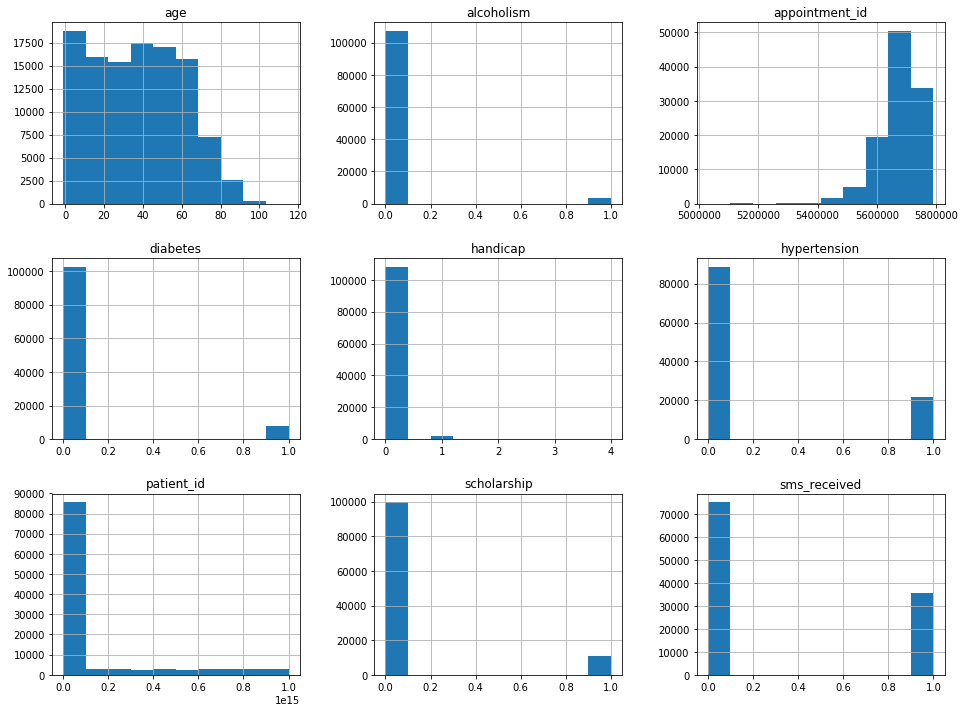

In [13]:
# ploting an histogram of all varibles to observe the distribution of variables
med_df.hist(figsize =(16,12));

### Observation from the histogram above

1. **Age**: The age of patients in the dataset is distributed evenly (uniform distribution), there are many young patients in the dataset and the number of patients dropped drastically at age 60. It also shows that we have very vew patients that are very old and above the age of 80.
2. **Alcoholism**: Most of the patients are not alcoholics and very few alcoholics.
3. **Diabetes**: Most of the patients are not diabetic and those that are more than those that are alcoholic.
4. **Handicap**: There are 5 categories of handicap with most of the patients not being handicapped.
5. **Hypertension**: Most of the patients are not hypertensive but those that are, are more than those that are diabetic and alcoholics.
6. **Scholarship**: Most of the patients do not have scholarships (not enrolled in Brasilian welfare program Bolsa Família)

### Age

In [14]:
# investigating the age range
# Print Unique Values
med_df.age.unique()

array([ 62,  56,   8,  76,  23,  39,  21,  19,  30,  29,  22,  28,  54,
        15,  50,  40,  46,   4,  13,  65,  45,  51,  32,  12,  61,  38,
        79,  18,  63,  64,  85,  59,  55,  71,  49,  78,  31,  58,  27,
         6,   2,  11,   7,   0,   3,   1,  69,  68,  60,  67,  36,  10,
        35,  20,  26,  34,  33,  16,  42,   5,  47,  17,  41,  44,  37,
        24,  66,  77,  81,  70,  53,  75,  73,  52,  74,  43,  89,  57,
        14,   9,  48,  83,  72,  25,  80,  87,  88,  84,  82,  90,  94,
        86,  91,  98,  92,  96,  93,  95,  97, 102, 115, 100,  99,  -1],
      dtype=int64)

From the observation of the unique ages above, it shows there are ages that are negative (-1) which is impossible. Also, there are patients that are in their hundreds, which is possible but unlikely. 
I will remove patient records below 0 and above 100.

In [15]:
# removing records below 0 and above 100
# first lets determine the count of patients below 0 and above 100
med_df[med_df.age < 0].count().patient_id , med_df[med_df.age >100].count().patient_id 

(1, 7)

There is 1 patient below 0 years and 7 patients above 100 years

In [16]:
# removing the 1 patient below 0 and 7 patients above 100 years

print('The no of all patient records in the database are {}'.format(med_df.count().patient_id))
print()
med_df = med_df[(med_df.age >= 0) & (med_df.age <= 100)]
print('The no of all patient records after the age drop in the database are {}'.format(med_df.count().patient_id))

The no of all patient records in the database are 110527

The no of all patient records after the age drop in the database are 110519


The patients in the database are now between the ages of 0 - 100 years.

### Handicap

In [17]:
# Print Unique Values
med_df.handicap.unique()

array([0, 1, 2, 3, 4], dtype=int64)

In [18]:
# The handicap column contains 5 numeric values (classes)
med_df.handicap.value_counts()

0    108282
1      2038
2       183
3        13
4         3
Name: handicap, dtype: int64

It shows that there are many patient records other than 0 or 1. So it does not seem like there is a typo.

### No Show appointment

In [19]:
med_df[med_df.no_show == 'No'].count().patient_id, med_df[med_df.no_show == 'Yes'].count().patient_id

(88203, 22316)

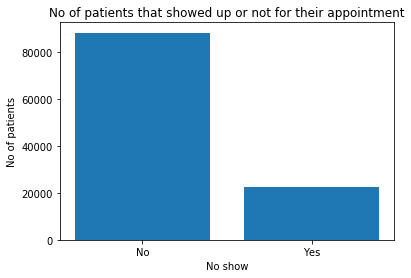

In [20]:
showed_up = med_df[med_df.no_show == 'No'].count().patient_id
not_showed_up = med_df[med_df.no_show == 'Yes'].count().patient_id

# Create a bar chart with proper labels
locations = [1, 2]
heights = [showed_up, not_showed_up]
labels = ['No', 'Yes']
plt.bar(locations, heights, tick_label=labels)
plt.title('No of patients that showed up or not for their appointment')
plt.xlabel('No show')
plt.ylabel('No of patients');

In [21]:
not_show =  med_df[med_df.no_show == 1].count().patient_id

In [22]:
# changing 'Yes' to 1 and 'No' to 0
med_df.no_show[med_df['no_show'] == 'Yes'] = '1'
med_df.no_show[med_df['no_show'] == 'No'] = '0'
med_df['no_show'] = pd.to_numeric(med_df['no_show'])

C:\Users\yinka\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [23]:
med_df.head()

,patient_id,appointment_id,gender,scheduled_day,appointment_day,age,neighbourhood,scholarship,hypertension,diabetes,alcoholism,handicap,sms_received,no_show
0,29872499824296,5642903,F,2016-04-29 18:38:08,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,0
1,558997776694438,5642503,M,2016-04-29 16:08:27,2016-04-29,56,JARDIM DA PENHA,0,0,0,0,0,0,0
2,4262962299951,5642549,F,2016-04-29 16:19:04,2016-04-29,62,MATA DA PRAIA,0,0,0,0,0,0,0
3,867951213174,5642828,F,2016-04-29 17:29:31,2016-04-29,8,PONTAL DE CAMBURI,0,0,0,0,0,0,0
4,8841186448183,5642494,F,2016-04-29 16:07:23,2016-04-29,56,JARDIM DA PENHA,0,1,1,0,0,0,0


In [24]:
med_df.corr()

,patient_id,appointment_id,age,scholarship,hypertension,diabetes,alcoholism,handicap,sms_received,no_show
patient_id,1.000000,0.004026,-0.004207,-0.002867,-0.006475,0.001617,0.011020,-0.007815,-0.009768,-0.001411
appointment_id,0.004026,1.000000,-0.019152,0.022624,0.012752,0.022636,0.032950,0.014114,-0.256627,-0.162585
age,-0.004207,-0.019152,1.000000,-0.092427,0.504788,0.292544,0.095877,0.077382,0.012712,-0.060476
scholarship,-0.002867,0.022624,-0.092427,1.000000,-0.019734,-0.024900,0.035018,-0.008521,0.001184,0.029147
hypertension,-0.006475,0.012752,0.504788,-0.019734,1.000000,0.433095,0.087971,0.080248,-0.006315,-0.035677
diabetes,0.001617,0.022636,0.292544,-0.024900,0.433095,1.000000,0.018470,0.057628,-0.014559,-0.015172
alcoholism,0.011020,0.032950,0.095877,0.035018,0.087971,0.018470,1.000000,0.004689,-0.026153,-0.000191
handicap,-0.007815,0.014114,0.077382,-0.008521,0.080248,0.057628,0.004689,1.000000,-0.024028,-0.006382
sms_received,-0.009768,-0.256627,0.012712,0.001184,-0.006315,-0.014559,-0.026153,-0.024028,1.000000,0.126472
no_show,-0.001411,-0.162585,-0.060476,0.029147,-0.035677,-0.015172,-0.000191,-0.006382,0.126472,1.000000


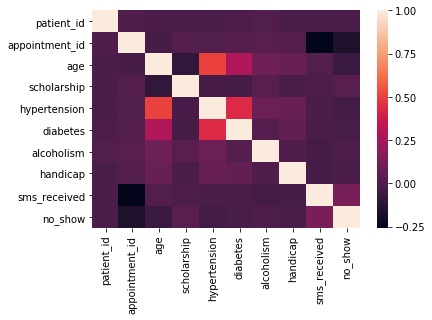

In [25]:
sns.heatmap(med_df.corr())

plt.savefig("Plotting_Correlation_HeatMap.jpg")

There is no significant correlation between the variables from the correlation map 

<a id='eda'></a>
## Exploratory Data Analysis

## Questions to explore
   
    1. What percentage of patients did not show up for their appointment? 
    2. Explore the distribution of appointments across the days of the week. This will help us know what days of the week patients prefer going to the hospitals.
    3. Does the neighbourhood for an appointment determine if a patient will show up or not?
    4. What factors are most important to determine if a patient shows up for an appointment or not? Explore the following dependent variables ('alcholism', 'handicap', 'diabetes', 'hypertension', 'gender', 'scholarship', 'age', 'sms_received') against the no_show variable to determine their relationship to no_show appointments.

### Research Question 1 (What is the percentage of patients that did not show up for their appointment?)

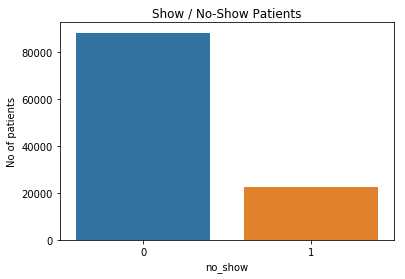

20% of patients missed their appointments .


In [26]:
#to find the percentage of no show, we have to calculate using = (no show/all appointments)*100

all_appointment = med_df.shape[0]
not_show =  med_df[med_df.no_show == 1].count().patient_id

not_show_calc = int(round((not_show/all_appointment)*100))

graph = sns.countplot(x = med_df.no_show, data = med_df)
graph.set_title("Show / No-Show Patients")
graph.set_ylabel('No of patients')

plt.show();

print('{}% of patients missed their appointments .'.format(not_show_calc))


### Research Question 2a (What days of the week do most patients schedule their appointments and least patients schedule their appointments?)

In [27]:
med_df['appointment_week'] = med_df.appointment_day.dt.weekday_name
med_df['awaiting_time_days'] = (med_df.appointment_day - med_df.scheduled_day).dt.days
# remove all records in awaiting_time_days that have days less than 0 as that is impossible
med_df = med_df[(med_df.awaiting_time_days >= 0)]
med_df.head()

,patient_id,appointment_id,gender,scheduled_day,appointment_day,age,neighbourhood,scholarship,hypertension,diabetes,alcoholism,handicap,sms_received,no_show,appointment_week,awaiting_time_days
5,95985133231274,5626772,F,2016-04-27 08:36:51,2016-04-29,76,REPÚBLICA,0,1,0,0,0,0,0,Friday,1
6,733688164476661,5630279,F,2016-04-27 15:05:12,2016-04-29,23,GOIABEIRAS,0,0,0,0,0,0,1,Friday,1
7,3449833394123,5630575,F,2016-04-27 15:39:58,2016-04-29,39,GOIABEIRAS,0,0,0,0,0,0,1,Friday,1
9,78124564369297,5629123,F,2016-04-27 12:48:25,2016-04-29,19,CONQUISTA,0,0,0,0,0,0,0,Friday,1
10,734536231958495,5630213,F,2016-04-27 14:58:11,2016-04-29,30,NOVA PALESTINA,0,0,0,0,0,0,0,Friday,1


In [28]:
# calculate the days of the weeks patients schedule their appointments
med_df.scheduled_day.dt.weekday_name.value_counts()



Tuesday      16990
Wednesday    15437
Monday       14950
Friday       12411
Thursday     12150
Saturday        16
Name: scheduled_day, dtype: int64

Most patients schedule their appointments on Tuesdays and few patients schedule their appointments on Saturdays.

### Research Question 2b  (What days of the week do most patients have their appointments?)

In [29]:
# calculate the days of the weeks patients have their appointments
med_df.appointment_week.value_counts()



Wednesday    17044
Tuesday      16462
Monday       14580
Friday       12515
Thursday     11322
Saturday        31
Name: appointment_week, dtype: int64

Most patients are appointed Wednesdays to visit the hospitals and few patients are appointed Saturday to visit the hospital. No patient is appointed on a Sunday.

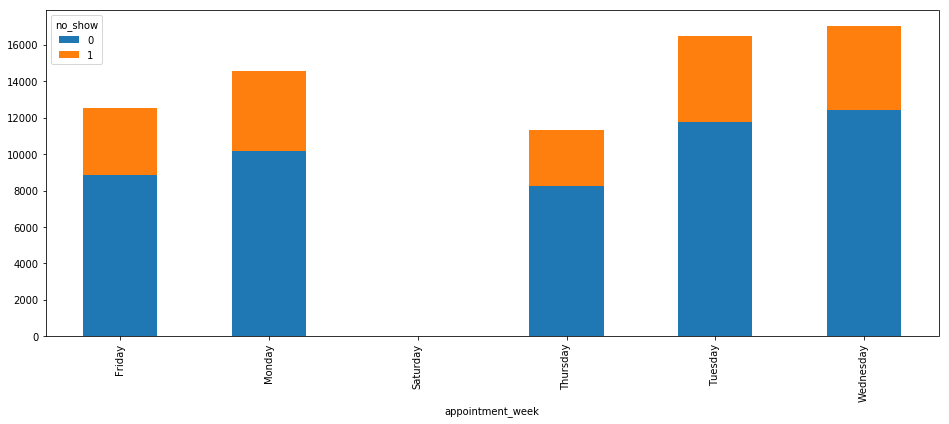

In [30]:
plt.rcParams["figure.figsize"] = (16,6)
pd.crosstab(med_df['appointment_week'], med_df['no_show']).plot(kind='bar', stacked=True)

### Research Question 3 (Does the neighbourhood for an appointment determine if a patient will show up or not?)

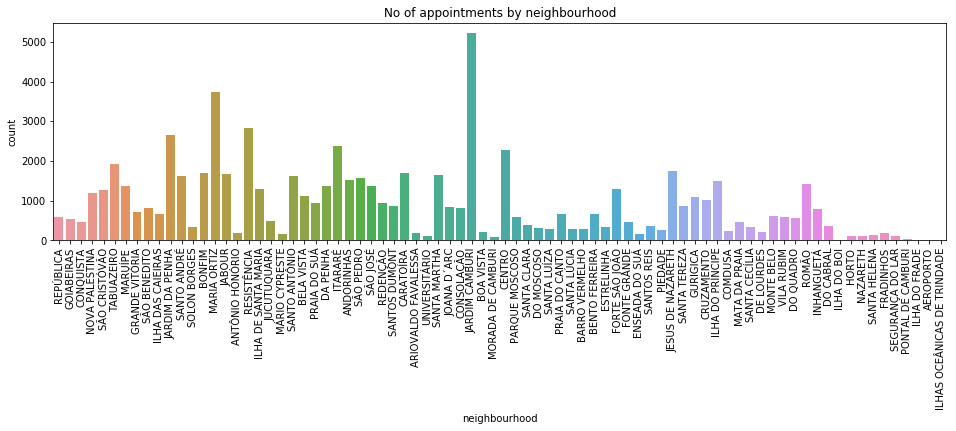

In [31]:
# Let's see how many patients there in in each neighbourhood
plt.figure(figsize=(16,4))
plt.xticks(rotation=90)
ax = sns.countplot(x=med_df.neighbourhood)
ax.set_title("No of appointments by neighbourhood")
plt.show()

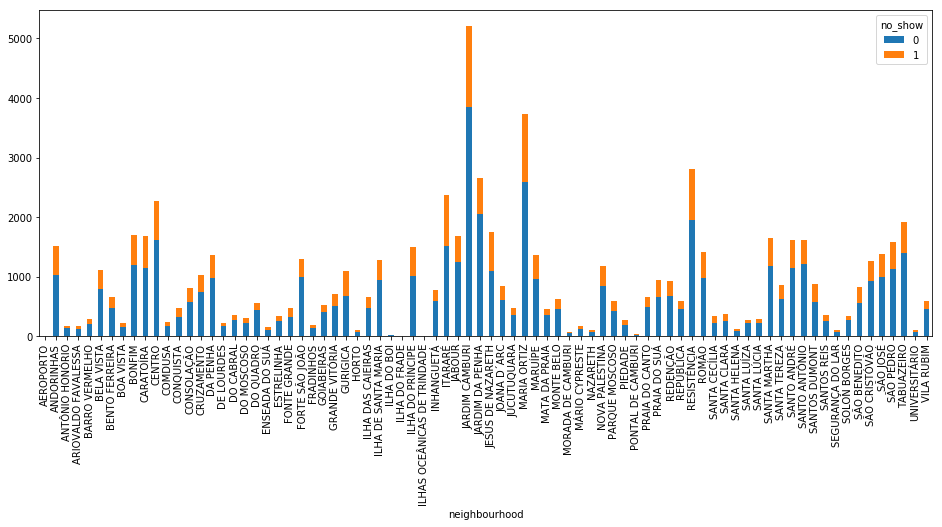

In [32]:
plt.rcParams["figure.figsize"] = (16,6)
pd.crosstab(med_df['neighbourhood'], med_df['no_show']).plot(kind='bar', stacked=True)

The graph shows that in each neighbourhood hospital all have more patients that showed up than did not show up. Thats a good sign that no hospital is lacking behind although there is a significant between neighbourhoods that have more patients that the others. <br>
**Conclusion: Neighbourhood does not determine if the patient will show up or not.**

### Research Question 4 (What are the most important features that determine if a patient makes it to their appointment?)

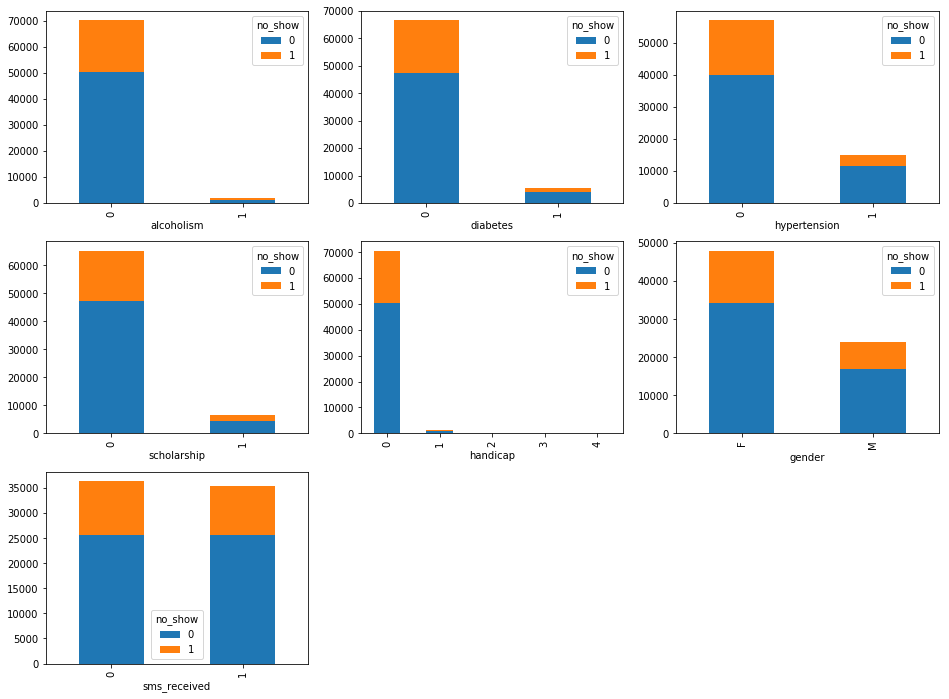

In [33]:
# plotting the categorical variables agaisnt the no_show appointments
cat_vars = ['alcoholism', 'diabetes', 'hypertension', 'scholarship',   'handicap', 'gender','sms_received']

fig = plt.figure(figsize=(16, 12))
for i, var in enumerate(cat_vars):
    ax = fig.add_subplot(3, 3, i+1)
    med_df.groupby([var, 'no_show'])[var].count().unstack('no_show').plot(ax=ax, kind='bar', stacked=True)

The chart for categorical variable does not show any indication of any particular category that has is more important to predict if a patient shows or not shows for their appointment. 

In [34]:
# Two useful masks to be used in further analysis
showed = med_df.no_show == 0
not_showed = med_df.no_show == 1

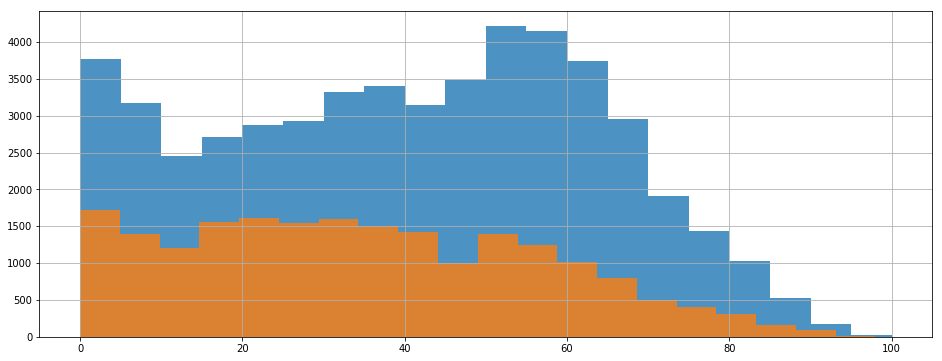

In [35]:
# using the numerical variables to analyze if they have more importance in predicting show/no-show apointments
# Age:
med_df.age[showed].hist(alpha=0.8, bins=20);
med_df.age[not_showed].hist(alpha=0.8, bins=20);

The distribution of the age confirms that about 20% of appointments were no-show.
it also shows that most of the patients that came for appointments were babies between 0 - 1 year, then with a fall to normal distribution of patients between 1 - 60 years. The distribution then becomes right skewed from ages 60 and above.

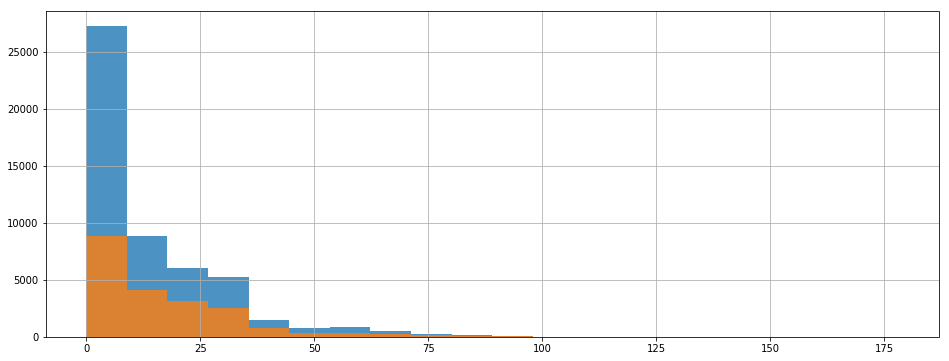

In [36]:
# Number of days between the date of scheduling an appointment and the appointment itself
med_df.awaiting_time_days[showed].hist(alpha=0.8, bins=20);
med_df.awaiting_time_days[not_showed].hist(alpha=0.8, bins=20);

Most appointments that were fulfilled were those that had their appointments scheduled in the same day. There was a drastic fall of patient showing onces their waiting days were more than a day.

<a id='conclusions'></a>
## Conclusions


### Findings from investigation of the No Show Appointments Dataset

1. The age of patients in the dataset is distributed evenly (uniform distribution), there are many young patients in the dataset and the number of patients dropped drastically at age 60. It also shows that we have very vew patients that are very old and above the age of 80.
2. Most of the patients are not alcoholics and very few alcoholics.
3. Most of the patients are not diabetic and those that are more than those that are alcoholic.
4. There are 5 categories of handicap with most of the patients not being handicapped.
5. Most of the patients are not hypertensive but those that are, are more than those that are diabetic and alcoholics.
6. Most of the patients do not have scholarships (not enrolled in Brasilian welfare program Bolsa Família)
7. 20% of patients missed their appointments.
8. Most patients schedule their appointments on Tuesdays and few patients schedule their appointments on Saturdays.
9. Most patients are appointed Wednesdays to visit the hospitals and few patients are appointed Saturday to visit the hospital. No patient is appointed on a Sunday.
10. The graph shows that in each neighbourhood hospital all have more patients that showed up than did not show up. Thats a good sign that no hospital is lacking behind although there is a significant between neighbourhoods that have more patients that the others. <br>
**Conclusion: Neighbourhood does not determine if the patient will show up or not.**
11. The chart for categorical variable does not show any indication of any particular category that has is more important to predict if a patient shows or not shows for their appointment. 
12. The distribution of the age confirms that about 20% of appointments were no-show.
it also shows that most of the patients that came for appointments were babies between 0 - 1 year, then with a fall to normal distribution of patients between 1 - 60 years. The distribution then becomes right skewed from ages 60 and above.
13. Most appointments that were fulfilled were those that had their appointments scheduled in the same day. There was a drastic fall of patient showing onces their waiting days were more than a day.




### Note: 

This data needs to be futher investigated more with advanced statistical analysis to find more correlations and conclusions as this investigation that was done was only an explorative analysis.